# 1. Introducción teórica

https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca

**Clustering** se refiere a un conjunto de técnicas no supervisadas que tiene por objetivo encontrar patrones o grupos (clusters) dentro de un conjunto de observaciones. Las particiones se establecen de forma que, las observaciones que están dentro de un mismo grupo, sean lo más homogéneas entre sí y distintas a las observaciones de otros grupos. El objetivo es encontrar clusters que maximicen la dispersión intercluster y minimicen la dispersión intracluster.

Los algoritmos de clustering basados en particiones hacen uso de un **centro** o **centroide** para representar cada agrupamiento. Así, cada cluster será la asignación de cada ejemplo en el conjunto de entrenamiento a uno de los centros o centroides o representantes.

# 2. K Means

**K-means** agrupa las observaciones en un número predefinido de K clusters de forma que, la suma de las varianzas internas de los clusters, sea lo menor posible.


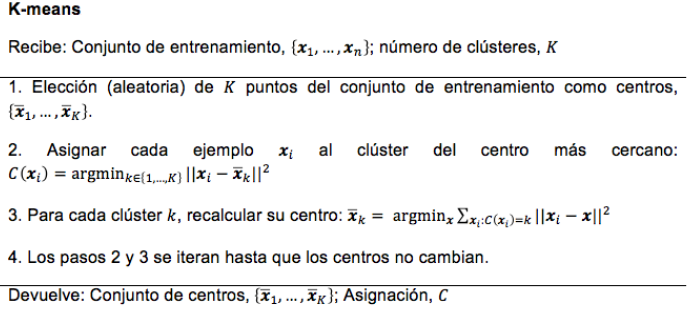

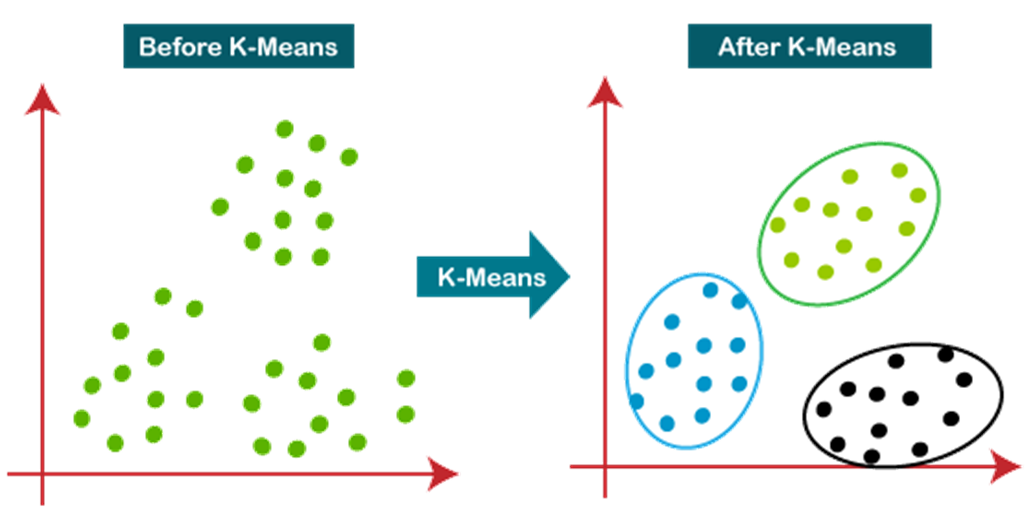

- Todas las observaciones pertenecen a un cluster y Ninguna observación pertenece a más de un cluster.
- Sencillo y rápido de implementar.
- Es necesario indicar el número de clusters a priori.
- Le cuesta detectar clusters con formas irregulares.
- Las agrupaciones resultantes pueden variar dependiendo de la asignación aleatoria inicial de los centroides --> repetir el proceso varias veces y seleccionar el que tenga menor suma total de varianza interna. 
- Sensible a outliers
- No funciona bien cuando los clusteres son de diferente tamaño o densidad, o no son convexos


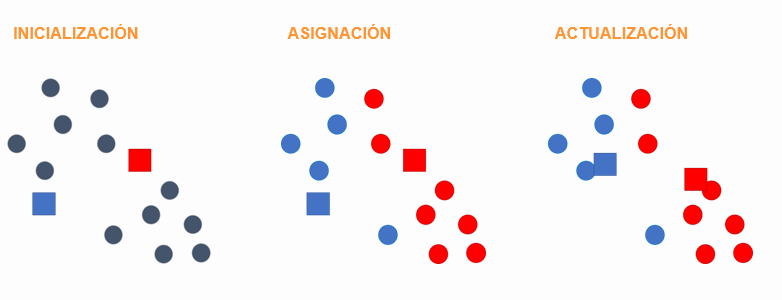

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import cluster
import matplotlib.pyplot as plt

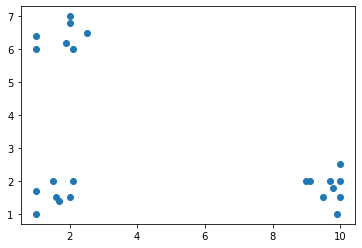

In [2]:
X = np.array([[1, 1.7],[1.5,2], [1,1], [2,1.5], [2,7],[2.5,6.5], [1,6.4],[1, 6],[2,6.8],
             [10, 2],[10, 2.5],[9.5,1.5],[9,2] ,[10, 1.5],
             [2.1,6],[1.9,6.2], [1.6,1.5],[1.7,1.4],[2.1,2],[9.9,1],[9.1,2],[9.8,1.8],[9.7,2]])
               
data = pd.DataFrame(X, columns = ["x", "y"])
plt.scatter(data.x, data.y)   

In [8]:
km = KMeans(n_clusters=3, 
           init='k-means++', 
           algorithm='auto')

In [4]:
km.fit(X)

KMeans(n_clusters=3)

In [5]:
km.cluster_centers_

array([[9.66666667, 1.81111111],
       [1.55714286, 1.58571429],
       [1.78571429, 6.41428571]])

In [6]:
centroides = pd.DataFrame(km.cluster_centers_, columns = ["x", "y"])
centroides

,x,y
0,9.666667,1.811111
1,1.557143,1.585714
2,1.785714,6.414286


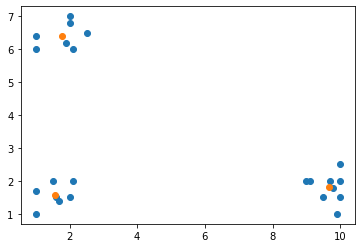

In [7]:
plt.scatter(data.x, data.y)
plt.scatter(centroides.x, centroides.y)


In [10]:
# Será la suma de las distancias al cuadrado de los puntos a sus respectivos centroides.
# Es la menor inercia que ha podido obtener el algoritmo.
km.inertia_

7.391746031746033

In [17]:
km.labels_

NameError: name 'km' is not defined

## 2.1 K Means con dataset Digits

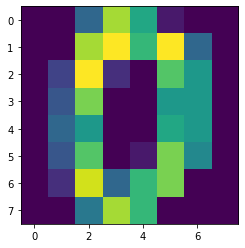

In [15]:
# Cada píxel es una variable, va a tener un espacio de 64 dimensiones
digits = load_digits()
digits.data.shape
plt.imshow(digits.data[0].reshape(8,8))

In [16]:
# utilizamos k-means para hacer el clustering
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

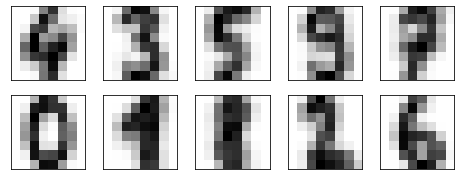

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
# Hacemos el reshape a (8,8) para imprimir en formato imagen
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [18]:
from sklearn.metrics import cluster
print('Completness score =', cluster.completeness_score(digits.target, clusters))
print('Homogeneidad =', cluster.homogeneity_score(digits.target, clusters))
print('Información mutua (ajustada) =', cluster.adjusted_mutual_info_score(digits.target, clusters))

Completness score = 0.7514312243853245
Homogeneidad = 0.7423769268336259
Información mutua (ajustada) = 0.7443265633359024


In [19]:
# Se asigna a cada cluster la etiqueta de la moda de sus elementos
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

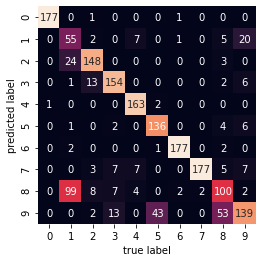

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Implementación del algoritmo utilizando técnicas de reducción de la dimensión

https://www.oreilly.com/content/an-illustrated-introduction-to-the-t-sne-algorithm/

In [23]:
from sklearn.manifold import TSNE
# Se va a utilizar este algoritmo para proyectar los datos en un espacio de dos dimensiones

C:\Users\UT06426\Anaconda3new\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


0.9421257651641625


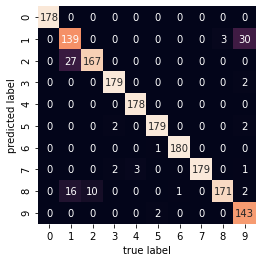

In [25]:
tsne = TSNE(n_components=2, init='random', random_state = 42)
digits_proj = tsne.fit_transform(digits.data)

# Clustering

kmeans = KMeans(n_clusters = 10, random_state=42)
clusters = kmeans.fit_predict(digits_proj)

# Se asignan etiquetas según moda
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Accuracy
print(accuracy_score(digits.target, labels))

# Confusion Matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# 3. K Medoids (*PAM Partitioning Around Medoids* )

**K-medoids** es un algoritmo de clustering muy similar a K-means ya que ambos agrupan las observaciones en K clusters. La principal diferencia radica en que en K-medoids, cada cluster está representado por una observación presente en el cluster, **medoid**, mientras que en K-means cada cluster está representado por su **centroide**, que se corresponde con el promedio de todas las observaciones del cluster pero con ninguna en particular. El medoid es el elemento más representativo del cluster.

Utilizar medoids en lugar de centroides hace de K-medoids un método más robusto que K-means, viéndose menos afectado por outliers.



In [10]:
#pip install scikit-learn-extra

In [6]:
from sklearn_extra.cluster import KMedoids
import numpy as np

In [9]:
X = np.asarray([[1, 2], [1, 4], [1, 0],
                [4, 2], [4, 4], [4, 0]])
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
print(kmedoids.labels_)

kmedoids.predict([[0,0], [4,4]])
print("Cluster centers, i.e. medoids (elements from the original dataset)")
print(kmedoids.cluster_centers_)
print("Inertia: Sum of distances of samples to their closest cluster center.")
print(kmedoids.inertia_)

[0 0 0 1 1 1]
Cluster centers, i.e. medoids (elements from the original dataset)
[[1 2]
 [4 2]]
Inertia: Sum of distances of samples to their closest cluster center.
8.0


# 4. Método del codo y de la silueta

https://medium.com/@jonathanrmzg/k-means-elbow-method-and-silhouette-e565d7ab87aa

### Método del codo
No es trivial elegir el número de clusters K, se puede hacer una inspeccion visual, incluso validación cruzada, pero uno de los métodos más habituales es utilizar el **método del codo o elbow method**. Este consiste en realizar diferentes ejecuciones del algoritmo K-means con diferentes valores (crecientes) de K, evaluando la dispersión intraclúster para obtener el mejor agrupamiento. 

Se mide la distancia más grande entre elementos del mismo grupo. Es útil porque muestra cómo el aumento del número de los clústeres contribuye a separar los clústeres de una manera significativa.

1. Se calcula el algoritmo de clustering para diferentes valores de K. 
2. Para cada K, se obtiene la suma total del cuadrado dentro del clúster.
3. Se plotea la curva de la suma de errores cuadráticos segúnn el número de grupos K.

El punto a partir del cual la curva no desciende de forma drástica, el codo, en la gráfica generalmente se considera como un indicador del número apropiado de grupos.

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

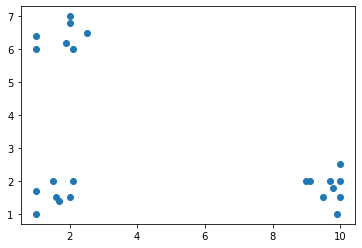

In [14]:
X = np.array([[1, 1.7],[1.5,2], [1,1], [2,1.5], [2,7],[2.5,6.5], [1,6.4],[1, 6],[2,6.8],
             [10, 2],[10, 2.5],[9.5,1.5],[9,2] ,[10, 1.5],
             [2.1,6],[1.9,6.2], [1.6,1.5],[1.7,1.4],[2.1,2],[9.9,1],[9.1,2],[9.8,1.8],[9.7,2]])
               
data = pd.DataFrame(X, columns = ["x", "y"])
plt.scatter(data.x, data.y)

In [15]:
inertias = []
n_clusters = range(1,10)
for n in n_clusters:
    km_model = KMeans(n_clusters = n)
    km_model.fit(data)
    inertias.append(km_model.inertia_)

C:\Users\UT06426\Anaconda3new\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


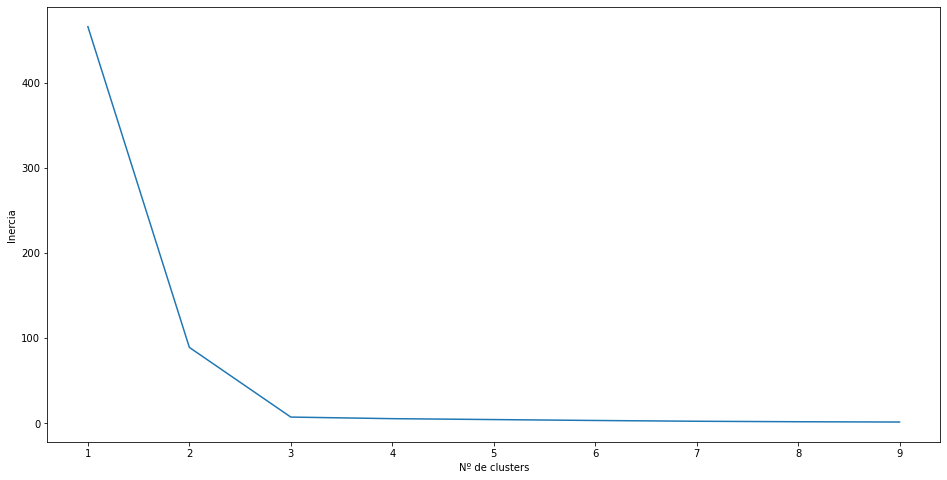

In [16]:
plt.figure(figsize=(16,8))
plt.plot(n_clusters, inertias)
plt.xlabel("Nº de clusters")
plt.ylabel("Inercia")
plt.show()

### Método de la silueta

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

El **método de la silueta** se puede utilizar para estudiar la distancia de separación entre los clusters. El gráfico de silueta muestra una medida de lo cerca está cada punto en un grupo de puntos en los grupos vecinos y, por lo tanto, proporciona una forma de evaluar parámetros como el número de grupos de forma visual. Esta medida tiene un rango de [-1, 1]. Se utiliza para saber lo "compactos" que son los clusters.

Los coeficientes de silueta (como se denominan estos valores) cercanos a +1 indican que la muestra está lejos de los conglomerados vecinos. Un valor de 0 indica que la muestra está en o muy cerca del límite de decisión entre dos conglomerados vecinos y los valores negativos indican que esas muestras podrían haber sido asignadas al conglomerado incorrecto.





For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


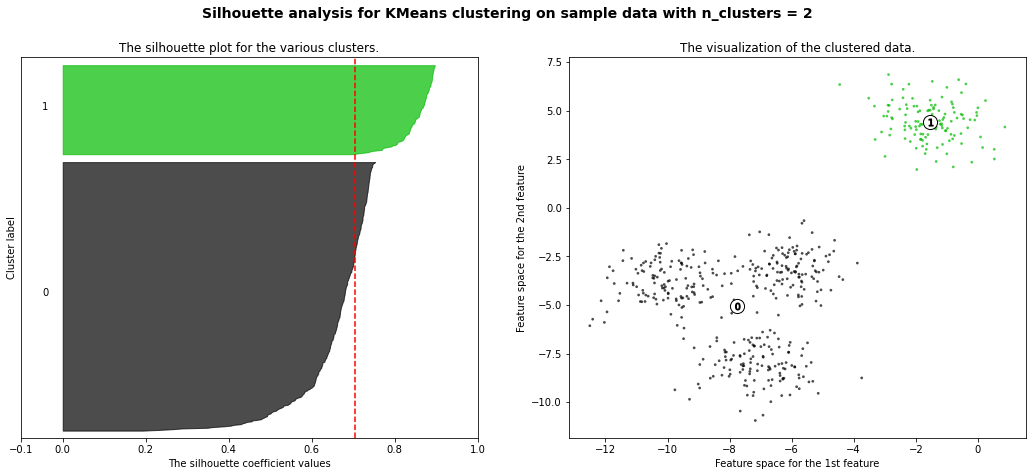

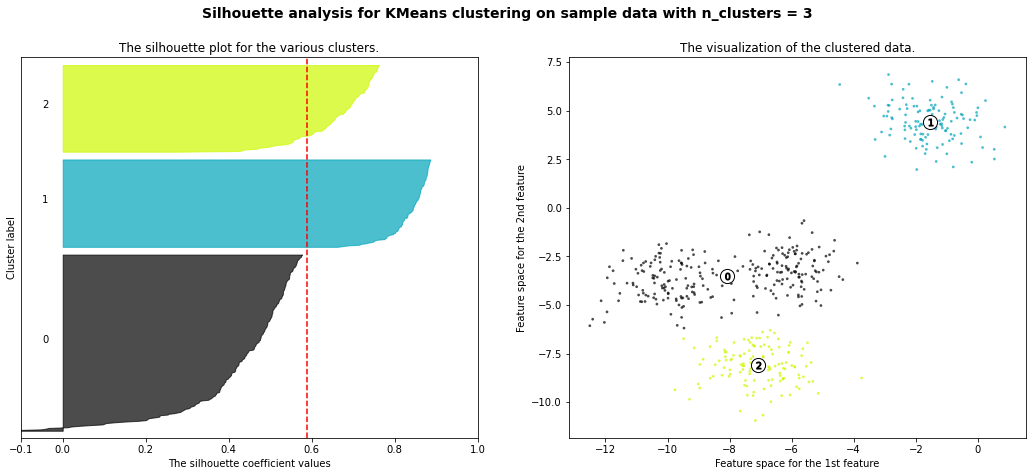

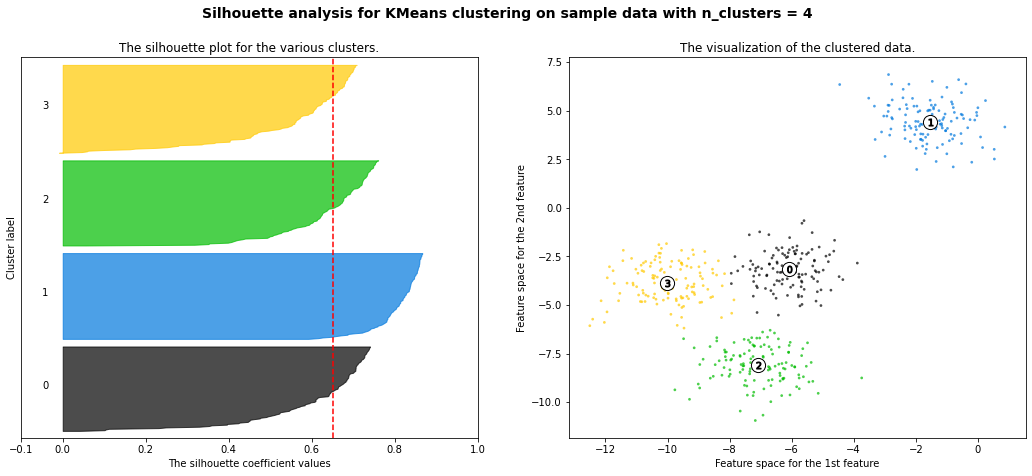

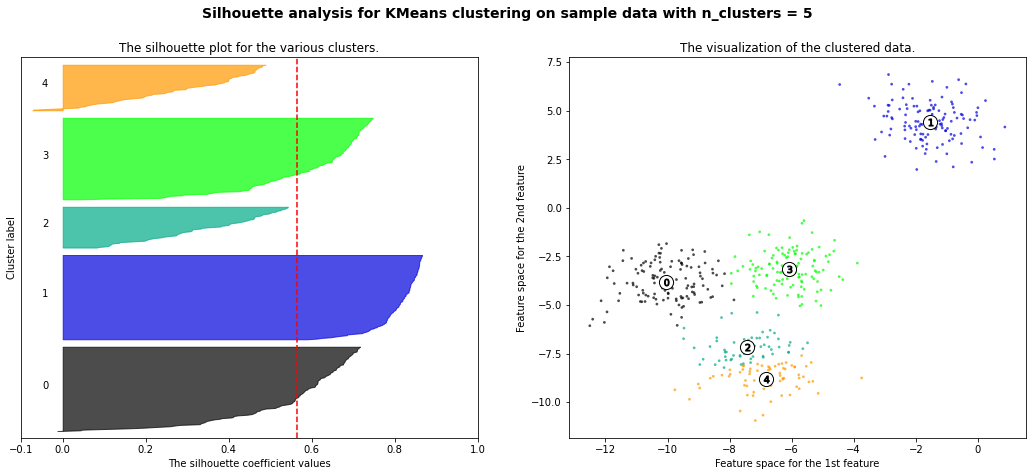

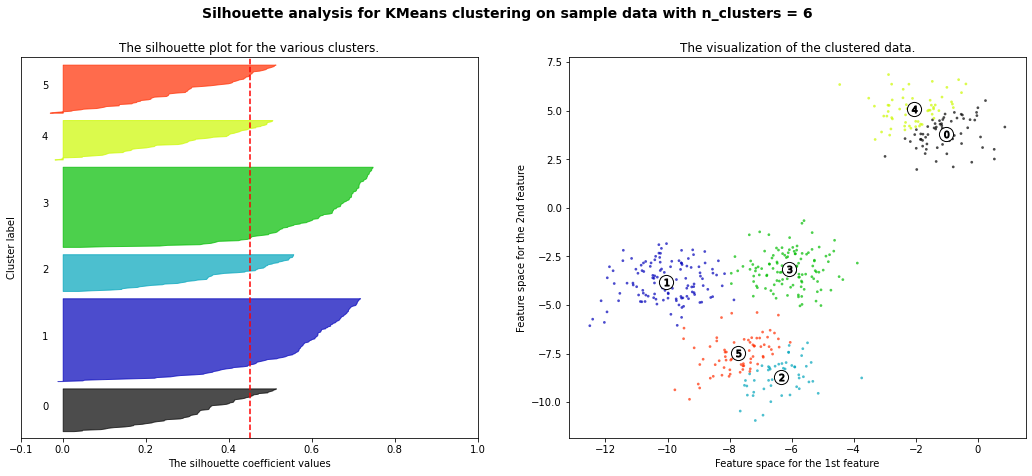

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# 5. KMeans ++

En KMeans la elección de los centros iniciales es aleatoria, y esta inicilización va a tener mucha influencia en el resultado final. El algoritmo **K-Means ++** es una variación de KMeans, donde la inicialización de los centros se hace favoreciendo la ditancia entre los centros iniciales. Es decir, un ejemplo tiene mayor probabilidad de ser escogido como centro inicial cuanto mayor sea su distancia con otros centros.
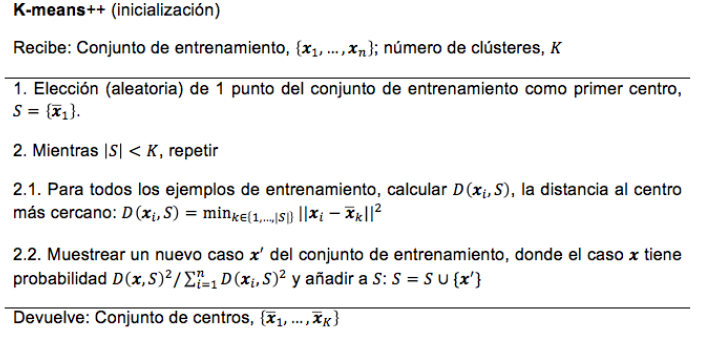

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [25]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2,init='k-means++').fit(X)
print("The lables are:")
print(kmeans.labels_)
print(kmeans.predict([[0, 0], [12, 3]]))
print("The cluster centers are:")
print(kmeans.cluster_centers_)


The lables are:
[1 1 1 0 0 0]
[1 0]
The cluster centers are:
[[10.  2.]
 [ 1.  2.]]
